In [6]:
import numpy as np
import pandas as pd
import re #regular expression
import os
import csv

import matplotlib.pyplot as plt

import librosa
from tqdm import tqdm


In [2]:
JIM_DATASET = "csv/clean_data_corpus_multicol.csv"

In [3]:
df = pd.read_csv(JIM_DATASET)
df.loc[df['gender'] == 'Transgender male', 'gender'] = 'Other'
df.loc[df['gender'] == 'Transgender female', 'gender'] = 'Other'
df.loc[df['gender'] == 'Prefer not to answer', 'gender'] = 'Other'

for j  in tqdm(range(1, len(df.columns[2:-6]))):
    for i in range(0, len(df)):
        df.iloc[i,j] = 'clean_audio/clean'+ str(df.iloc[i,j])

# drop columns 'response45' and 'response47'. These are not the voice of the speaker (it recorded voice)
#df = df.drop(['response45', 'response47'], axis=1)



100%|██████████| 48/48 [00:22<00:00,  2.13it/s]


### Sleepiness degree distribution

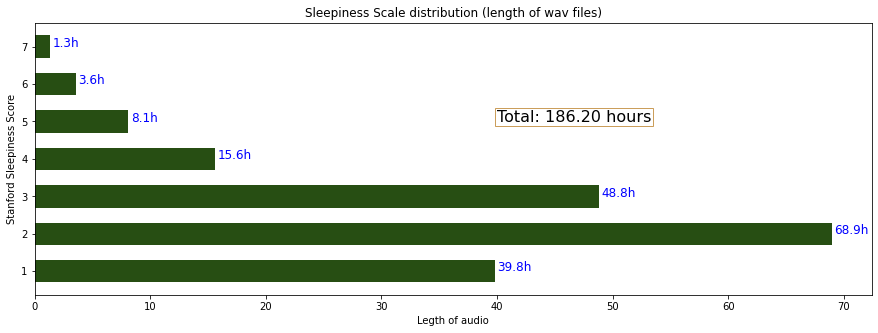

In [4]:
# SSS distrubtion
sleepy_classes = list(np.unique(df.sss))
#sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', sleepy_classes))
sleepy_dist = df.groupby(['sss'])['total_duration'].sum()/3600

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Sleepiness Scale distribution (length of wav files)', y=1)
ax.barh(sleepy_classes, sleepy_dist, 0.6, color='#274e13')
ax.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")
for i, length in enumerate(sleepy_dist):
    plt.text(y=i+1, x=length+.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')


plt.text(40, 5,f'Total: %.2f hours'%sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))
plt.show()

### Gender distribution

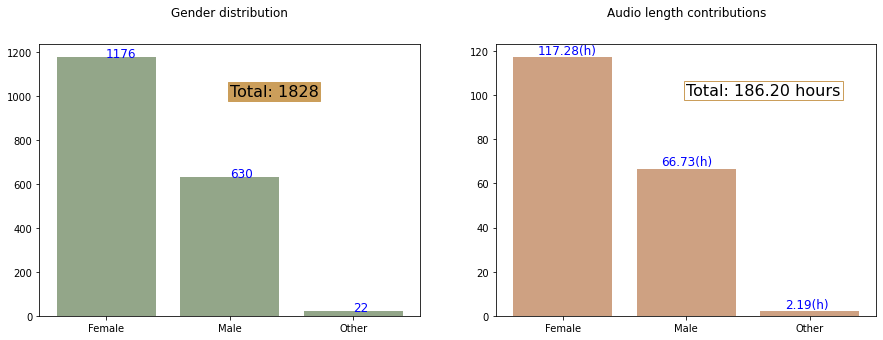

Female distribution: Non-sleepy:980 / Sleepy:196
Male distribution: Non-sleepy:549 / Sleepy:81


In [19]:
# Gender distribution
gender_classes = list(np.unique(df.gender))
gender_dist = df.groupby(['gender'])['session_id'].count()

fig= plt.figure(figsize=(15, 5))

# number of participants
ax1 = plt.subplot(121)
ax1.set_title('Gender distribution', y=1.08)
ax1.bar(gender_classes, gender_dist, color="#93a689")
for sex, count in enumerate(gender_dist):
    plt.text(x=sex, y=count+.5, s=f'%d'%count , fontdict=dict(fontsize=12), color='blue')
ax1.text(1,1000,f'Total: %.d'%gender_dist.sum(),\
         bbox={'facecolor':'#cb9e5a','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# length of audio for each gender
gender_wav_length_dist = df.groupby(['gender'])['total_duration'].sum()/3600
ax2 = plt.subplot(122)
ax2.set_title('Audio length contributions', y=1.08)
ax2.bar(gender_classes, gender_wav_length_dist, color="#cea182")
for sex, length in enumerate(gender_wav_length_dist):
    plt.text(x=sex-.2, y=length+1.5, s=f'%.2f(h)'%length , fontdict=dict(fontsize=12), color='blue')
ax2.text(1, 100,f'Total: %.2f hours'%sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))
plt.show()



# distribution in each gender
df_female = df[df.gender=='Female']
female_sleepy_dist = df_female.groupby(['sss'])['session_id'].count()

sleepy = 0
non_sleepy = 0
for i, num in enumerate(female_sleepy_dist):
    if i < 3: 
        non_sleepy += num
    else:
        sleepy += num
        
# print(female_sleepy_dist)
print('Female distribution: Non-sleepy:{} / Sleepy:{}'.format(non_sleepy, sleepy))

df_male = df[df.gender=='Male']
male_sleepy_dist = df_male.groupby(['sss'])['session_id'].count()
sleepy = 0
non_sleepy = 0
for i, num in enumerate(male_sleepy_dist):
    if i < 3: 
        non_sleepy += num
    else:
        sleepy += num
print('Male distribution: Non-sleepy:{} / Sleepy:{}'.format(non_sleepy, sleepy))



### Gender - Sleepiness Degree distribution

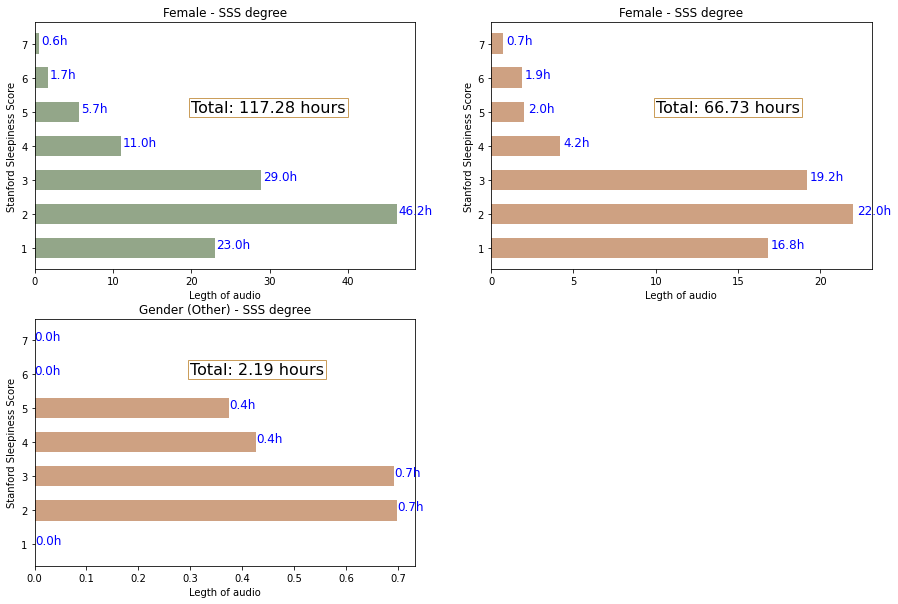

In [6]:
fig= plt.figure(figsize=(15, 10))

# sleepiness among females
df_female = df[df.gender=='Female']
# female_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_female.sss))))
female_sleepy_classes = list(np.unique(df_female.sss))
female_sleepy_dist = df_female.groupby(['sss'])['total_duration'].sum()/3600

ax1 = plt.subplot(221)
ax1.set_title('Female - SSS degree', y=1)
ax1.barh(female_sleepy_classes, female_sleepy_dist, 0.6, color='#93a689')
ax1.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")

for i, length in enumerate(female_sleepy_dist):
    plt.text(y=i+1, x=length+0.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax1.text(20, 5,f'Total: %.2f hours'%female_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# sleepiness among MALES
df_male = df[df.gender=='Male']
# male_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_male.sss))))
male_sleepy_classes = list(np.unique(df_male.sss))
male_sleepy_dist = df_male.groupby(['sss'])['total_duration'].sum()/3600
ax2 = plt.subplot(222)
ax2.set_title('Female - SSS degree', y=1)
ax2.barh(male_sleepy_classes, male_sleepy_dist, 0.6, color='#cea182')
ax2.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")
for i, length in enumerate(male_sleepy_dist):
    plt.text(y=i+1, x=length+0.2 , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax2.text(10, 5,f'Total: %.2f hours'%male_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

# sleepiness among OTHER gender
df_other_gender = df[df.gender=='Other']
# other_gender_sleepy_classes = list(map(lambda x: (re.findall("\d", x)[0]) if type(x) is str else '', \
#                                  list(np.unique(df_other_gender.sss))))
other_gender_sleepy_classes = list(np.unique(df_other_gender.sss))
other_gender_sleepy_classes.append(6)
other_gender_sleepy_classes.append(7)
other_gender_sleepy_dist = df_other_gender.groupby(['sss'])['total_duration'].sum()/3600
other_gender_sleepy_dist['6'] = 0
other_gender_sleepy_dist['7'] = 0
ax3 = plt.subplot(223)
ax3.set_title('Gender (Other) - SSS degree', y=1)
ax3.set(ylabel="Stanford Sleepiness Score", xlabel="Legth of audio")

# ax3.barh(other_gender_sleepy_classes, other_gender_sleepy_dist, 0.6, color='#cea182')
ax3.barh(other_gender_sleepy_classes, other_gender_sleepy_dist, 0.6, color='#cea182')

for i, length in enumerate(other_gender_sleepy_dist):
    plt.text(y=i+1, x=length , s=f'%.1fh'%length , fontdict=dict(fontsize=12), color='blue')
ax3.text(0.3, 6, f'Total: %.2f hours'%other_gender_sleepy_dist.sum(),\
         bbox={'facecolor':'white','alpha':2,'edgecolor':'#cb9e5a','pad':2},
        fontdict=dict(fontsize=16))

plt.show()



# Grouping the responses

### Group1 - Reading [1, 6]
- >The quick brown fox jumps over the lazy dog.
- >Do you like amusement parks? Well, I sure do. To amuse myself, I went twice last spring. My most MEMORABLE moment was riding on the Caterpillar, which is a gigantic roller coaster high above the ground. When I saw how high the Caterpillar rose into the bright blue sky I knew it was for me. After waiting in line for thirty minutes, I made it to the front where the man measured my height to see if I was tall enough. I gave the man my coins, asked for change, and jumped on the cart. Tick, tick, tick, the Caterpillar climbed slowly up the tracks. It went SO high I could see the parking lot. Boy was I SCARED! I thought to myself, There™s no turning back now. People were so scared they screamed as we swiftly zoomed fast, fast, and faster along the tracks. As quickly  as it started, the Caterpillar came to a stop. Unfortunately, it was time to pack the car and drive home. That night I dreamt of the wild ride on the Caterpillar. Taking a trip to the amusement park and riding on the Caterpillar was my MOST memorable moment ever!

### Group2 - Hearing and repeat [46, 48]
- repeat back what you just heard as accurately as possible
-- (https://s3.amazonaws.com/www.voiceome.org/data/mandog.mp3)
-- (https://s3.amazonaws.com/www.voiceome.org/data/tourbus.mp3)


### Group3 - Non-semantic [7:9, 35:44]
- When ready please start the recording, take a deep breath, and then say <b>/a/</b> for as long as you can sustain the sound. Stop the recording when finished. e.g.(https://s3.amazonaws.com/www.voiceome.org/data/Aaaaa.mp3).

- When ready, start the recording by clicking the timer below and say <b>puh-puh-puh</b> repeatedly as quickly and accurately as possible in the time allowed.

- When ready, start the recording by clicking the timer below and say <b>puh-tuh-kuh</b> repeatedly in that order as quickly and accurately as possible in the time allowed.

- Speak these nonesense word you see below:
+ <i>plive, fwov, zowl, zulx, vave, kwaj, jome, bwiz, broe, nayb</i>



### Group4 - Picture description [3, 10:34 ]
- Tell us everything you see going on in this picture.(http://www.neurolex.co/uploads/alphasia.png)
- named the thing shown on a picture

### Group5 - Personal memory [2, 49, 50]
- Tell us about a recent happy memory based on experiences from the past month.
- Please state any chronic or active medical conditions for which you are treated by a healthcare professional.
- List the names of all prescription medications or daily supplements which you are actively taking.

### Group6 - Semantic fluency [4, 5]
- Name all the <b>animals</b> you can think of as quickly as possible before the time elapses below.
- Name all the words beginning with the letter <b>F</b> you can think of as quickly as possible before the time elapses below.


> <font color=blue>Columns 45 and 47 actually are not responses from the user. These audio file was recoreded when the participant heard the sample speech</font>

--------------------------------------------------------
## New group
### Group1 - Reading [1, 6]
- >_The quick brown fox jumps over the lazy dog._
- > _Do you like amusement parks? Well, I sure do. To amuse myself, I went twice last spring. My most MEMORABLE moment was riding on the Caterpillar, which is a gigantic roller coaster high above the ground. When I saw how high the Caterpillar rose into the bright blue sky I knew it was for me. After waiting in line for thirty minutes, I made it to the front where the man measured my height to see if I was tall enough. I gave the man my coins, asked for change, and jumped on the cart. Tick, tick, tick, the Caterpillar climbed slowly up the tracks. It went SO high I could see the parking lot. Boy was I SCARED! I thought to myself, There™s no turning back now. People were so scared they screamed as we swiftly zoomed fast, fast, and faster along the tracks. As quickly  as it started, the Caterpillar came to a stop. Unfortunately, it was time to pack the car and drive home. That night I dreamt of the wild ride on the Caterpillar. Taking a trip to the amusement park and riding on the Caterpillar was my MOST memorable moment ever!_
 
### Group2 - Hearing and repeat [46, 48]
- repeat back what you just heard as accurately as possible
-- (https://s3.amazonaws.com/www.voiceome.org/data/mandog.mp3)
-- (https://s3.amazonaws.com/www.voiceome.org/data/tourbus.mp3)

### Group3 - Speechless  [7,8, 9]
- When ready please start the recording, take a deep breath, and then say <b>/a/</b> for as long as you can sustain the sound. Stop the recording when finished. e.g.(https://s3.amazonaws.com/www.voiceome.org/data/Aaaaa.mp3).

- When ready, start the recording by clicking the timer below and say <b>puh-puh-puh</b> repeatedly as quickly and accurately as possible in the time allowed.

- When ready, start the recording by clicking the timer below and say <b>puh-tuh-kuh</b> repeatedly in that order as quickly and accurately as possible in the time allowed.

### Group4 - Nonsense words [35:44]
- Speak these nonesense word you see below: <i>plive, fwov, zowl, zulx, vave, kwaj, jome, bwiz, broe, nayb</i>

### Group5 - Personal memory [2, 49, 50]
- Tell us about a recent happy memory based on experiences from the past month.
- Please state any chronic or active medical conditions for which you are treated by a healthcare professional.
- List the names of all prescription medications or daily supplements which you are actively taking.

### Group6 - Semantic fluency [4, 5]
- Name all the <b>animals</b> you can think of as quickly as possible before the time elapses below.
- Name all the words beginning with the letter <b>F</b> you can think of as quickly as possible before the time elapses below.


### Group7 - Picture description [3]
- Tell us everything you see going on in this picture.(http://www.neurolex.co/uploads/alphasia.png)


### Group8 - Object naming [10:34 ]
- named the thing shown on a picture








------------------


### Thorsten Müller (German Emotional-TTS dataset)

In [ ]:
test_data_path = 'test_audio/thorsten-emotional_v02/sleepy'
files = os.listdir(test_data_path)

sleepy_levels = []
wav_files = []
for fn in tqdm(files):
    if os.path.splitext(fn)[1].EQUA == '.wav':
        sleepy_levels.append(np.random.randint(4, 8))
        wav_files.append(fn)

df = pd.DataFrame(data={'file':wav_files, 'sss':sleepy_levels})
df.to_csv('csv/thorsten_test.csv', index=False)



In [ ]:
import IPython.display as ipd
ipd.Audio(test_data_path+'/'+df.at[0, 'file']) 

In [ ]:
from transformers import Wav2Vec2Processor, TFHubertModel

wav_dir = 'test_audio/thorsten-emotional_v02/sleepy'
df = pd.read_csv('csv/thorsten_test.csv')

filenames = df.file
filenames = list(map(lambda f: 'test_audio/thorsten-emotional_v02/sleepy/' + os.path.splitext(f)[0] + '.npy',\
                     filenames))
df.file = filenames

for idx in tqdm(df.index):
    label = df.at[idx, 'sss']
    fn = df.at[idx, 'file']

    x_embedding = np.load(fn)

    # error even the numpy file existed
    if np.isnan(x_embedding).any():
        x_embedding = np.zeros((1, 1024))
        print(fn+' NaN error')
        
    elif str(x_embedding.shape) == '()':
        x_embedding = np.zeros((1, 1024))
        print(fn + ' () error')
    
    print(x_embedding.shape)
    



## Show 1-masked-group training results (mean of 5 iterations)

In [72]:
import json
 
f = open('model4-masking-200ep_results.json',)
#f = open('model4-1group-masked-200ep_results.json',)
f = open('images/acc_model4_masked.json')

data = json.load(f)
# Closing file
f.close()

MASKED_GROUPS = ['masked_group'+str(i) for i in range(0,9)]

for g in MASKED_GROUPS:
    print(g.upper())
    print('\tacc-train \tacc-test(%) \tf1-train(avg) \tf1-test(avg)')
    
    mean_acc_train, mean_acc_test = 0, 0
    mean_f1_train, mean_f1_test = 0, 0
    for i in range(1, 6):  #train1 - train5
        dat = data['Train-'+str(i)][g]
        accuracy = dat['Accuracy (train,test)']
        train_f1 = dat['Train f1-score(l0,l1,mean)']
        test_f1 = dat['Test f1-score(l0,l1,mean)']
        print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(accuracy[0], accuracy[1], train_f1[2], test_f1[2]))
        
        mean_acc_train += accuracy[0]
        mean_acc_test += accuracy[1]
        mean_f1_train += train_f1[2]
        mean_f1_test += test_f1[2]
        
    print('\t---------------------------------------------------------')
    print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(mean_acc_train/5, mean_acc_test/5, mean_f1_train/5, mean_f1_test/5))


MASKED_GROUP0
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	100.00 		84.15 		1.0000 		0.6179
	100.00 		87.98 		1.0000 		0.7265
	100.00 		92.08 		1.0000 		0.8306
	100.00 		93.97 		1.0000 		0.8931
	100.00 		97.53 		1.0000 		0.9536
	---------------------------------------------------------
	100.00 		91.14 		1.0000 		0.8043
MASKED_GROUP1
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	99.73 		81.69 		0.9948 		0.5448
	99.73 		87.98 		0.9948 		0.7213
	99.86 		94.81 		0.9974 		0.8927
	99.86 		97.26 		0.9974 		0.9480
	100.00 		98.63 		1.0000 		0.9734
	---------------------------------------------------------
	99.84 		92.07 		0.9969 		0.8160
MASKED_GROUP2
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	99.73 		83.88 		0.9948 		0.5718
	99.73 		88.80 		0.9948 		0.7326
	99.86 		92.62 		0.9974 		0.8499
	99.86 		97.53 		0.9974 		0.9522
	100.00 		96.44 		1.0000 		0.9309
	---------------------------------------------------------
	99.84 		91.85 		0.9969 		0.8075
MASKED_GROUP3
	acc-t

## Show 1-masked-group training results

In [60]:
import json
 
#f = open('model4-masking-200ep_results.json',)
f = open('model4-1group-masked-200ep_results.json',)

data = json.load(f)
# Closing file
f.close()

MASKED_GROUPS = ['masked_group'+str(i) for i in range(0,9)]

for i in range(1, 6):  #train1 - train5
    print('TRAIN-'+str(i))
    print('\tMasked\tacc-train \tacc-test(%) \tf1-train(avg) \tf1-test(avg)')

    for k, g in enumerate(MASKED_GROUPS):
        dat = data['Train-'+str(i)][g]
        accuracy = dat['Accuracy (train,test)']
        train_f1 = dat['Train f1-score(l0,l1,mean)']
        test_f1 = dat['Test f1-score(l0,l1,mean)']
        print(f'\t%s\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%('Gr'+str(k), accuracy[0], accuracy[1], train_f1[2], test_f1[2]))
    

TRAIN-1
	Masked	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	Gr0	100.00 		83.06 		1.0000 		0.5552
	Gr1	99.73 		80.05 		0.9948 		0.5662
	Gr2	99.59 		78.69 		0.9922 		0.5405
	Gr3	99.73 		78.69 		0.9948 		0.5405
	Gr4	96.99 		82.24 		0.9393 		0.5283
	Gr5	99.93 		78.42 		0.9987 		0.4847
	Gr6	99.59 		80.60 		0.9922 		0.5627
	Gr7	99.11 		81.42 		0.9834 		0.5773
	Gr8	99.46 		85.85 		0.9239 		0.1368
TRAIN-2
	Masked	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	Gr0	100.00 		85.52 		1.0000 		0.6851
	Gr1	99.32 		87.16 		0.9871 		0.6807
	Gr2	83.04 		71.58 		0.7676 		0.6445
	Gr3	95.08 		80.33 		0.9165 		0.6920
	Gr4	99.73 		86.89 		0.9948 		0.7016
	Gr5	99.66 		84.70 		0.9935 		0.7048
	Gr6	99.66 		81.42 		0.9935 		0.6127
	Gr7	98.97 		84.70 		0.9810 		0.6959
	Gr8	84.47 		84.43 		0.4579 		0.4578
TRAIN-3
	Masked	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	Gr0	100.00 		92.62 		1.0000 		0.8396
	Gr1	99.86 		94.54 		0.9974 		0.8897
	Gr2	96.92 		89.62 		0.9460 		0.8244
	Gr3	99.86 		93.

## Show 1-unmasked-group training results

In [34]:
import json

f = open('model4-1group-unmasked-200ep_results.json',)
data = json.load(f)
# Closing file
f.close()

MASKED_GROUPS = ['unmasked_group'+str(i) for i in range(1,9)]

for g in MASKED_GROUPS:
    print(g.upper())
    print('\tacc-train \tacc-test(%) \tf1-train(avg) \tf1-test(avg)')
    
    mean_acc_train, mean_acc_test = 0, 0
    mean_f1_train, mean_f1_test = 0, 0
    for i in range(1, 6):
        dat = data['Train-'+str(i)][g]
        accuracy = dat['Accuracy (train,test)']
        train_f1 = dat['Train f1-score(l0,l1,mean)']
        test_f1 = dat['Test f1-score(l0,l1,mean)']
        print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(accuracy[0], accuracy[1], train_f1[2], test_f1[2]))
        
        mean_acc_train += accuracy[0]
        mean_acc_test += accuracy[1]
        mean_f1_train += train_f1[2]
        mean_f1_test += test_f1[2]
        
    print('\t---------------------------------------------------------')
    print(f'\t%.2f \t\t%.2f \t\t%.4f \t\t%.4f'%(mean_acc_train/5, mean_acc_test/5, mean_f1_train/5, mean_f1_test/5))


UNMASKED_GROUP1
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	94.53 		67.76 		0.9081 		0.4952
	100.00 		83.61 		1.0000 		0.6741
	80.44 		71.58 		0.7427 		0.6547
	100.00 		96.16 		1.0000 		0.9251
	98.29 		93.15 		0.9688 		0.8778
	---------------------------------------------------------
	94.65 		82.45 		0.9239 		0.7254
UNMASKED_GROUP2
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	15.46 		15.85 		0.1339 		0.1368
	84.47 		84.43 		0.4579 		0.4578
	15.73 		14.75 		0.1359 		0.1286
	15.45 		15.89 		0.1338 		0.1371
	15.52 		15.62 		0.1343 		0.1351
	---------------------------------------------------------
	29.33 		29.31 		0.1992 		0.1991
UNMASKED_GROUP3
	acc-train 	acc-test(%) 	f1-train(avg) 	f1-test(avg)
	15.46 		15.85 		0.1339 		0.1368
	84.47 		84.43 		0.4579 		0.4578
	84.27 		85.25 		0.4573 		0.4602
	84.55 		84.11 		0.4581 		0.4568
	84.48 		84.38 		0.4579 		0.4577
	---------------------------------------------------------
	70.65 		70.80 		0.3930 		0.3938
UNMASKED_GROUP4
	acc

In [71]:
print('abc'.upper())

ABC
